<a href="https://colab.research.google.com/github/CharlyPierce/Basico/blob/main/Copy_of_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow basics

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/basics"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide provides a quick overview of _TensorFlow basics_. Each section of this doc is an overview of a larger topic—you can find links to full guides at the end of each section.

TensorFlow is an end-to-end platform for machine learning. It supports the following:

* Multidimensional-array based numeric computation (similar to <a href="https://numpy.org/" class="external">NumPy</a>.)
* GPU and distributed processing
* Automatic differentiation
* Model construction, training, and export
* And more

## Tensors

TensorFlow operates on multidimensional arrays or _tensors_ represented as `tf.Tensor` objects. Here is a two-dimensional tensor:

In [ ]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


The most important attributes of a `tf.Tensor` are its `shape` and `dtype`:

* `Tensor.shape`: tells you the size of the tensor along each of its axes.
* `Tensor.dtype`: tells you the type of all the elements in the tensor.

TensorFlow implements standard mathematical operations on tensors, as well as many operations specialized for machine learning.

For example:

In [ ]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [ ]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [ ]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.nn.softmax(x, axis=-1)

In [ ]:
tf.reduce_sum(x)

Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

In [ ]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


Refer to the [Tensor guide](tensor.ipynb) for details.

## Variables

Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.

In [ ]:
var = tf.Variable([0.0, 0.0, 0.0])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [ ]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

Refer to the [Variables guide](variable.ipynb) for details.

## Automatic differentiation

<a href="https://en.wikipedia.org/wiki/Gradient_descent" class="external">_Gradient descent_</a> and related algorithms are a cornerstone of modern machine learning.

To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's _error_ or _loss_ with respect to its weights.

In [ ]:
x = tf.Variable(1.0)
def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

At `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`.

The derivative of `y` is `y' = f'(x) = (2*x + 2) = 4`. TensorFlow can calculate this automatically:

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

This simplified example only takes the derivative with respect to a single scalar (`x`), but TensorFlow can compute the gradient with respect to any number of non-scalar tensors simultaneously.

Refer to the [Autodiff guide](autodiff.ipynb) for details.

## Graphs and tf.function

While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

* **Performance optimization**: to speed up training and inference.
* **Export**: so you can save your model when it's done training.

These require that you use `tf.function` to separate your pure-TensorFlow code from Python.

In [ ]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

tf.Tensor([1 2], shape=(2,), dtype=int32)


The first time you run the `tf.function`, although it executes in Python, it captures a complete, optimized graph representing the TensorFlow computations done within the function.

In [ ]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. Below, note that `my_func` doesn't print _tracing_ since `print` is a Python function, not a TensorFlow function.

In [ ]:
x = tf.constant([10, 9, 8])
my_func(x)#No imprime el print de my_func

<tf.Tensor: shape=(), dtype=int32, numpy=27>

A graph may not be reusable for inputs with a different _signature_ (`shape` and `dtype`), so a new graph is generated instead:

In [ ]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [ ]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

These captured graphs provide two benefits:

* In many cases they provide a significant speedup in execution (though not this trivial example).
* You can export these graphs, using `tf.saved_model`, to run on other systems like a [server](https://www.tensorflow.org/tfx/serving/docker) or a [mobile device](https://www.tensorflow.org/lite/guide), no Python installation required.

Refer to [Intro to graphs](intro_to_graphs.ipynb) for more details.

## Modules, layers, and models

`tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. The `tf.Module` class is necessary to support two significant features:

1. You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.
2. You can import and export the `tf.Variable` values _and_ the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

Here is a complete example exporting a simple `tf.Module` object:

In [ ]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [ ]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

Save the `Module`:

In [ ]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


The resulting SavedModel is independent of the code that created it. You can load a SavedModel from Python, other language bindings, or [TensorFlow Serving](https://www.tensorflow.org/tfx/serving/docker). You can also convert it to run with [TensorFlow Lite](https://www.tensorflow.org/lite/guide) or [TensorFlow JS](https://www.tensorflow.org/js/guide).

In [ ]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

The `tf.keras.layers.Layer` and `tf.keras.Model` classes build on `tf.Module` providing additional functionality and convenience methods for building, training, and saving models. Some of these are demonstrated in the next section.

Refer to [Intro to modules](intro_to_modules.ipynb) for details.

In [ ]:
class Mammal():
  def __init__(self, mammalName):
    print(mammalName, 'is a mammal.')#----------------------------->6
class CannotFly(Mammal):
  def __init__(self, mammalThatCantFly):
    print(mammalThatCantFly, "cannot fly.")#----------------------->4
    print('4')#---------------------------------------------------->5
    super().__init__(mammalThatCantFly)#SE espera hasta que se ejecute
    print('2')#---------------------------------------------------->7
class CannotSwim(Mammal):
  def __init__(self, mammalThatCantSwim):
    print(mammalThatCantSwim, "cannot swim.")#---------------------->2
    print('3')#----------------------------------------------------->3
    super().__init__(mammalThatCantSwim)#SE espera hasta que se ejecute
    print('1')#----------------------------------------------------->8
class Cat(CannotSwim, CannotFly):
  def __init__(self):
    print('I am a cat.');#------------------------------------------>1
    super().__init__('Cat')
# Driver code
cat = Cat()
print('')
bat = CannotSwim('Bat')

I am a cat.
Cat cannot swim.
3
Cat cannot fly.
4
Cat is a mammal.
2
1

Bat cannot swim.
3
Bat is a mammal.
1


## Training loops

Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve:

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [ ]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)#convierte en float  x

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

# plt.plot(x.numpy(), y.numpy(), '.', label='Data')
# plt.plot(x, f(x),  label='Ground truth')
# plt.legend();

Create a model:

In [ ]:
class Model(tf.keras.Model):
  def __init__(self, units):
    super().__init__()#inicia el init de tf.keras.Model
    self.dense1 = tf.keras.layers.Dense(units=units,activation=tf.nn.relu,kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal,use_bias=True,)
    self.dense2 = tf.keras.layers.Dense(1,use_bias=True)

  def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]#agregas dim
    x = self.dense1(x)#conectamos capa con datos#64,64
    x = self.dense2(x)#conectamos capa con capa #64,1
    return tf.squeeze(x, axis=1)#eliminamos la dim agregada

In [ ]:
model=None
model = Model(64)
model(x)
model.variables#aqui se guardan matriz de pesos y bias

In [ ]:
# plt.plot(x.numpy(), y.numpy(), '.', label='data')
# plt.plot(x, f(x),  label='Ground truth')
# plt.plot(x, model(x), label='Untrained predictions')
# plt.title('Before training')
# plt.legend();

In [ ]:
#Ejecutamos model(x) el modelo con los datos para q se creen matriz de pesos 
# model(x)

In [ ]:
len(model.variables),#tf.size(model.variables[0]#,tf.size(model.variables[1])#,tf.size(model.variables[2]),tf.size(model.variables[3])
#El 4 representa todas las variables de tf las primeras 64 son de pesos Wij luego 

(4,)

In [ ]:
model.variables[3]

<tf.Variable 'model_1/dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

Write a basic training loop:

In [ ]:
# y
import numpy as np
s=tf.constant(np.array([4,5,6,]),dtype=tf.float32)
r=tf.constant(np.array([5]),dtype=tf.float32)
tf.reduce_mean((s-r)**2)#1+0

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

In [ ]:
x1 = tf.constant(3.0)
y1 = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x1)
  y = x1**2 + y1**2#2x#2y#
dy_dx = g.gradient(y, x1,y1)
print(dy_dx)

tf.Tensor(18.0, shape=(), dtype=float32)


In [ ]:
2*x,2*y

In [ ]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x
  dy_dx = gg.gradient(y, x)  # dy_dx = 2 * x
d2y_dx2 = g.gradient(dy_dx, x)  # d2y_dx2 = 2
print(dy_dx)
print(d2y_dx2)

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  y = x * x
  z = y * y
dz_dx = g.gradient(z, x)  # (4*x^3 at x = 3)
print(dz_dx)

dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  y = x * x
  z = y * y
dz_dx = g.gradient(z, x)  # (4*x^3 at x = 3)
print(dz_dx)

dy_dx = g.gradient(y, x)
print(dy_dx)

In [ ]:
# x

In [ ]:
a = tf.keras.layers.Dense(32,activation=tf.keras.activations.sigmoid,use_bias=True)
b = tf.keras.layers.Dense(32)
inputs=x[:,tf.newaxis]
with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(a.variables)  # Since `a.build` has not been called at this point
                           # `a.variables` will return an empty list and the
                           # tape will not be watching anything.
  result = b(a(inputs))
  tape.gradient(result, a.variables)

In [ ]:
a(x[:1,tf.newaxis])#b(a(x[:,tf.newaxis]))#Error y correccion
#los datos se les aplica la multiplicacion de pesos y la no linealidad

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.618223  , 0.5420903 , 0.5852159 , 0.49977705, 0.54655826,
        0.412072  , 0.5531327 , 0.5371635 , 0.5073717 , 0.33009124,
        0.44701153, 0.4071725 , 0.42902854, 0.30698007, 0.29970735,
        0.43934292, 0.451623  , 0.46800053, 0.30077744, 0.466281  ,
        0.52717215, 0.46275973, 0.4376695 , 0.44597757, 0.47405195,
        0.39769912, 0.40051126, 0.33864766, 0.40131062, 0.40787187,
        0.46063656, 0.6100233 ]], dtype=float32)>

In [ ]:
class Model(tf.keras.Model):
  def __init__(self, units=64):
    super().__init__()#inicia el init de tf.keras.Model
    self.dense1 = tf.keras.layers.Dense(units=units,activation=tf.nn.relu,kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal,use_bias=True,)
    self.dense2 = tf.keras.layers.Dense(1,use_bias=True)
  def call(self, x, training=True):# For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]#agregas dim
    x = self.dense1(x)#conectamos capa con datos#64,64
    x = self.dense2(x)#conectamos capa con capa #64,1
    return tf.squeeze(x, axis=1)#eliminamos la dim agregada
model=None
model = Model(64)
model(x)
# model.variables#aqui se guardan matriz de pesos y bias

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([1.2794337 , 1.2648962 , 1.2503581 , 1.2358204 , 1.2212826 ,
       1.2067448 , 1.19259   , 1.1788313 , 1.1650733 , 1.1513147 ,
       1.1375562 , 1.1237977 , 1.1101583 , 1.0970395 , 1.0841403 ,
       1.0712414 , 1.0583426 , 1.0454439 , 1.0325449 , 1.021196  ,
       1.0098758 , 0.99855536, 0.98723507, 0.9759147 , 0.9645946 ,
       0.953274  , 0.94195396, 0.9306337 , 0.9193134 , 0.9079931 ,
       0.89667284, 0.8853526 , 0.8740767 , 0.86253995, 0.85066044,
       0.8387806 , 0.8269011 , 0.8150215 , 0.8031418 , 0.7912622 ,
       0.77938247, 0.7675029 , 0.7556232 , 0.74374354, 0.73186386,
       0.7205063 , 0.7095874 , 0.69866836, 0.68810827, 0.6777338 ,
       0.6677902 , 0.6581644 , 0.6485385 , 0.63891244, 0.6292864 ,
       0.61966044, 0.6123128 , 0.6054481 , 0.59812737, 0.59080654,
       0.5834858 , 0.576165  , 0.5688441 , 0.56152326, 0.5532193 ,
       0.5407911 , 0.5283629 , 0.51593465, 0.5035063 , 0.49107808,
       0.47864

In [ ]:
v1=variables#Variables originales sin cambio alguno de gradiente
v1

[<tf.Variable 'model_5/dense_24/kernel:0' shape=(1, 64) dtype=float32, numpy=
 array([[-1.7945760e+00, -5.4097664e-01, -9.3208623e-01, -3.0194232e-01,
          2.5897403e+00, -4.6935323e-01, -5.3792572e-01, -1.7199419e+00,
          3.6403257e-01, -3.6298666e-02, -2.6537970e-01, -6.5207666e-01,
          2.1940899e+00, -1.2902273e+00, -2.2236723e-01,  4.2057294e-01,
         -1.9799800e+00,  2.8541310e+00, -2.4522883e-01,  1.9490534e-01,
         -3.6510152e-01, -5.2348351e-01, -6.6579229e-01, -4.8657876e-01,
         -4.5761222e-01, -9.0416348e-01,  4.8814955e+00, -8.7383157e-01,
         -2.7359119e-05, -6.7617673e-01,  4.2381568e+00, -4.1973591e-01,
         -6.9341785e-01,  7.4203949e+00,  2.2711235e-01, -6.9105339e-01,
         -1.2922050e+00, -3.4170836e-01,  1.0859723e+00, -1.6532971e+00,
         -3.8997626e-01, -1.2331154e+00, -5.0103140e-01, -3.0680269e-01,
          5.9188104e-01, -9.8695660e-01,  7.7346001e+00, -9.4894069e-01,
          3.1917698e+00, -7.1791852e-01,  8.76

In [ ]:
variables[0]#variables aplicando gradiente cambiado

<tf.Variable 'model_5/dense_24/kernel:0' shape=(1, 64) dtype=float32, numpy=
array([[-2.0445762 , -0.79097664, -1.1820862 , -0.55194235,  2.3397403 ,
        -0.71935326, -0.7879257 , -1.9699419 ,  0.11403257, -0.28629866,
        -0.5153797 , -0.90207666,  1.9440899 , -1.5402273 , -0.47236723,
         0.17057294, -2.22998   ,  2.604131  , -0.49522883, -0.05509466,
        -0.6151015 , -0.7734777 , -0.9157923 , -0.7365743 , -0.7076122 ,
        -1.1541635 ,  4.6314955 , -1.1238316 , -0.25002733, -0.9261767 ,
         3.9881568 , -0.6697359 , -0.94341785,  7.170395  , -0.02288765,
        -0.9410534 , -1.542205  , -0.59170836,  0.8359723 , -1.9032971 ,
        -0.63997626, -1.4831154 , -0.7510314 , -0.5568027 ,  0.34188104,
        -1.2369566 ,  7.4846    , -1.1989408 ,  2.9417698 , -0.9679185 ,
         8.512299  , -1.6866566 ,  1.4887526 , -1.3669516 , -1.8203968 ,
        -1.5169832 ,  0.29799426, -1.2134489 , -0.8278752 , -0.7053989 ,
        -0.4292289 , -1.070689  , -0.90660775, 

In [ ]:
v1[0]-(0.05*g2[0])#v1 son originales - lr * gradiente cambiado
#0 g sin 5 gr con -1.7945760e+00
#-2.0445762 #llegada

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[-2.2945762 , -1.0409766 , -1.4320862 , -0.80194235,  2.0897403 ,
        -0.96935326, -1.0379257 , -2.2199419 , -0.13596743, -0.53629863,
        -0.7653797 , -1.1520767 ,  1.6940899 , -1.7902273 , -0.7223672 ,
        -0.07942706, -2.47998   ,  2.354131  , -0.7452288 , -0.30509466,
        -0.8651015 , -1.0234718 , -1.1657922 , -0.9865698 , -0.9576122 ,
        -1.4041635 ,  4.3814955 , -1.3738316 , -0.5000273 , -1.1761768 ,
         3.7381568 , -0.9197359 , -1.1934178 ,  6.920395  , -0.27288765,
        -1.1910534 , -1.792205  , -0.84170836,  0.5859723 , -2.153297  ,
        -0.88997626, -1.7331154 , -1.0010314 , -0.8068027 ,  0.09188104,
        -1.4869566 ,  7.2346    , -1.4489408 ,  2.6917698 , -1.2179185 ,
         8.262299  , -1.9366566 ,  1.2387526 , -1.6169516 , -2.070397  ,
        -1.7669832 ,  0.04799426, -1.4634489 , -1.0778751 , -0.9553989 ,
        -0.6792289 , -1.320689  , -1.1566077 , -0.34426326]],
      dtype=f

In [ ]:
optimizer.apply_gradients(zip(g2,variables))#aplicamos grandientes con cambio a variables originales
#variables originales guardadas en v1 debe ser ahora distinta a variables

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1001>

In [ ]:
g2=gradient=[g+5 for g in gradient]#gradientes con cambio
g2

[<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
 array([[5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 4.999883, 5.      , 4.999911,
         5.      , 5.      , 5.      , 5.      , 4.999999, 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      , 5.      , 5.      ,
         5.      , 5.      , 5.      , 5.      ]], dtype=float32)>,
 <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
        5.       , 5.       , 5.       , 5.       , 5.       , 5.     

In [ ]:
g1=gradient#Gradientes originales sin cambio alguno
g1

[<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -1.16982985e-04,  0.00000000e+00, -8.93235192e-05,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -9.35229764e-07,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.0000

In [ ]:
# gradient#(1,64)(64)(64,1)
# variables#(1,64)(64),(64,1)

In [ ]:
class Model(tf.keras.Model):
  def __init__(self, units=64):
    super().__init__()#inicia el init de tf.keras.Model
    self.dense1 = tf.keras.layers.Dense(units=units,activation=tf.nn.relu,kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal,use_bias=True,)
    self.dense2 = tf.keras.layers.Dense(1,use_bias=True)
  def call(self, x, training=True):# For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]#agregas dim
    x = self.dense1(x)#conectamos capa con datos#64,64
    x = self.dense2(x)#conectamos capa con capa #64,1
    return tf.squeeze(x, axis=1)#eliminamos la dim agregada
model=None
model = Model(64)
model(x)
# model.variables#aqui se guardan matriz de pesos y bias

In [ ]:
variables = model.variables#matriz de pesos y de bias
optimizer = tf.optimizers.SGD(learning_rate=0.05)
for step in range(1000):
  with tf.GradientTape() as tape:#dado que en tf.GradientTape() observa todas las variables
  #por defecto entonces no es necesario usar tape.watch(x) para habilitar gradientes con respecto a x
    prediction = model(x)#calcula Numeros
    error = (y-prediction)**2#Erros Cuadratico 
    mean_error = tf.reduce_mean(error)#Suma y divide#saca promedio del error
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))#aplica los gradiantes a las variables 
  # variables-lr*gradient->Lo aplica a variables, se queda guardado ahí

  if step % 100 == 0:
    print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 14.001
Mean squared error: 1.101
Mean squared error: 1.053
Mean squared error: 1.026
Mean squared error: 1.005
Mean squared error: 0.996
Mean squared error: 0.992
Mean squared error: 0.990
Mean squared error: 0.989
Mean squared error: 0.988


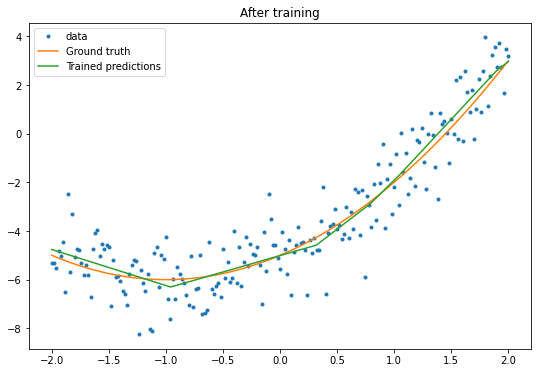

In [ ]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();

That's working, but remember that implementations of common training utilities are available in the `tf.keras` module. So consider using those before writing your own. To start with, the `Model.compile` and  `Model.fit` methods implement a training loop for you:

In [ ]:
new_model = Model(64)

In [ ]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets


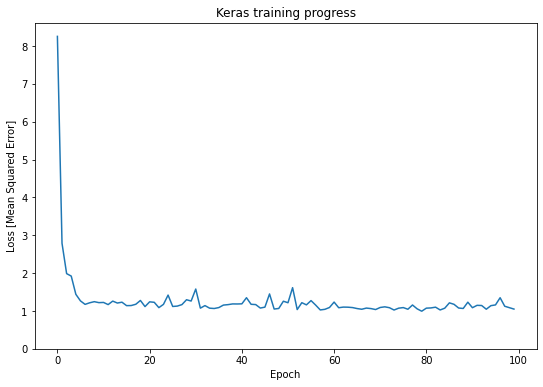

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

Refer to [Basic training loops](basic_training_loops.ipynb) and the [Keras guide](https://www.tensorflow.org/guide/keras) for more details.